# **CCEM Image processing #2**

Introduction to data filtering, segmentation and features measurement

In [ ]:
# To run only if using jupyter notebook through binder
# Install the required packages in Jupyter kernel (internet connection required)
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install imageio
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install matplotlib_scalebar
!{sys.executable} -m pip install scikit-image
!{sys.executable} -m pip install scipy

In [59]:
# Libraries from tutorial #1
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_scalebar as Scalebar
import imageio as io

# Scipy and scikit-image libraries for simple image filtering, segmemtation and measurements  
import scipy.signal as signal
import skimage.filters as filters
import skimage.measure as measure
import skimage.morphology as morphology

# Additional libraries for data visualization
from skimage.color import label2rgb
from matplotlib.patches import Rectangle

# Library from numpy to mask arrays
import numpy.ma as ma

Links to libraries documentation
1. Numpy ==> <https://numpy.org/doc/stable/reference/index.html>
2. imageio ==> <https://imageio.readthedocs.io/en/stable/reference/userapi.html>
3. matplotlib.pyplot ==> <https://matplotlib.org/stable/api/pyplot_summary.html>
4. matplotlib_scalebar ==> <https://pypi.org/project/matplotlib-scalebar/>
5. scikit-image ==> <https://scikit-image.org/docs/stable/api/api.html>
6. scipy ==> <https://scipy.github.io/devdocs/reference/index.html>

In [2]:
%matplotlib notebook

## Load and plot the data

In [119]:
image = io.imread('blobs.tif')
#image = io.imread('0013_Ceta.tif')[:,:,0]
print(image)
print(np.shape(image))

[[ 40  32  24 ... 216 200 200]
 [ 56  40  24 ... 232 216 216]
 [ 64  48  24 ... 240 232 232]
 ...
 [ 72  80  80 ...  48  48  48]
 [ 80  80  80 ...  48  48  48]
 [ 96  88  80 ...  48  48  48]]
(254, 256)


<IPython.core.display.Javascript object>


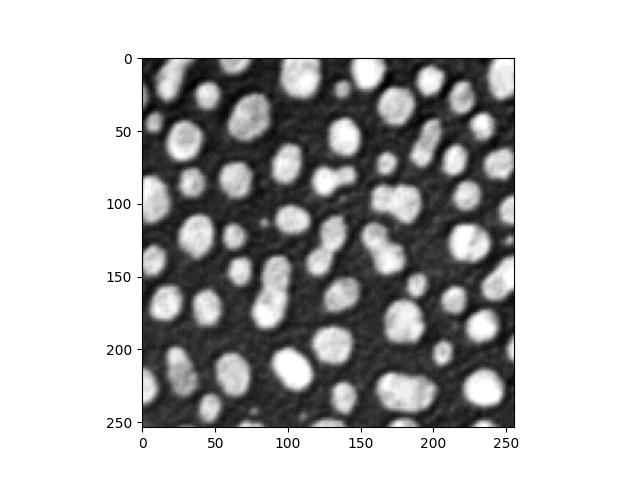

In [120]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image, cmap='gray')

plt.show()

## Gaussian smoothing 

Convolution of the image with a Gaussian kernel ==> Reduce noise at the cost of blurring

In [121]:
# 3x3 kernel of sigma = 1 pixel
gaussian_kernel_3x3 = np.array([[1, 2, 1], [1, 4, 1], [1, 2, 1]])
print(gaussian_kernel_3x3)

[[1 2 1]
 [1 4 1]
 [1 2 1]]


In [122]:
gaussian_kernel_3x3_norm = gaussian_kernel_3x3 / np.sum(gaussian_kernel_3x3)
print(gaussian_kernel_3x3_norm)

[[0.07142857 0.14285714 0.07142857]
 [0.07142857 0.28571429 0.07142857]
 [0.07142857 0.14285714 0.07142857]]


In [123]:
image_smooth_3x3 = signal.convolve2d(image, gaussian_kernel_3x3_norm)

<IPython.core.display.Javascript object>


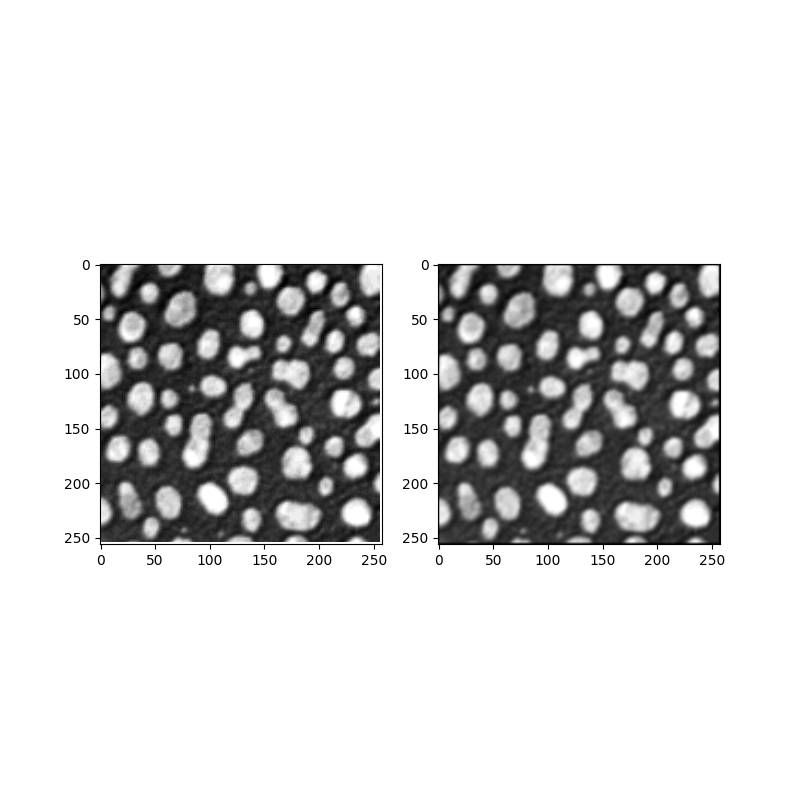

In [124]:
fig = plt.figure(figsize=(8, 8))
ax_left = fig.add_subplot(121)
ax_right = fig.add_subplot(122, sharex=ax_left, sharey=ax_left)
ax_left.imshow(image, cmap='gray')
ax_right.imshow(image_smooth_3x3, cmap='gray')

plt.show()

In [125]:
# 5x5 kernel of sigma = 1 pixel
gaussian_kernel_5x5 = np.array([[1, 4, 7, 4, 1], [4, 16, 26, 16, 4], [7, 26, 41, 26, 7], [4, 16, 26, 16, 4], [1, 4, 7, 4, 1]])
gaussian_kernel_5x5_norm = gaussian_kernel_5x5 / np.sum(gaussian_kernel_5x5)
print(gaussian_kernel_5x5, '\n', gaussian_kernel_5x5_norm)

[[ 1  4  7  4  1]
 [ 4 16 26 16  4]
 [ 7 26 41 26  7]
 [ 4 16 26 16  4]
 [ 1  4  7  4  1]] 
 [[0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.02564103 0.0952381  0.15018315 0.0952381  0.02564103]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]]


In [126]:
image_smooth_5x5 = signal.convolve2d(image, gaussian_kernel_5x5_norm)

<IPython.core.display.Javascript object>


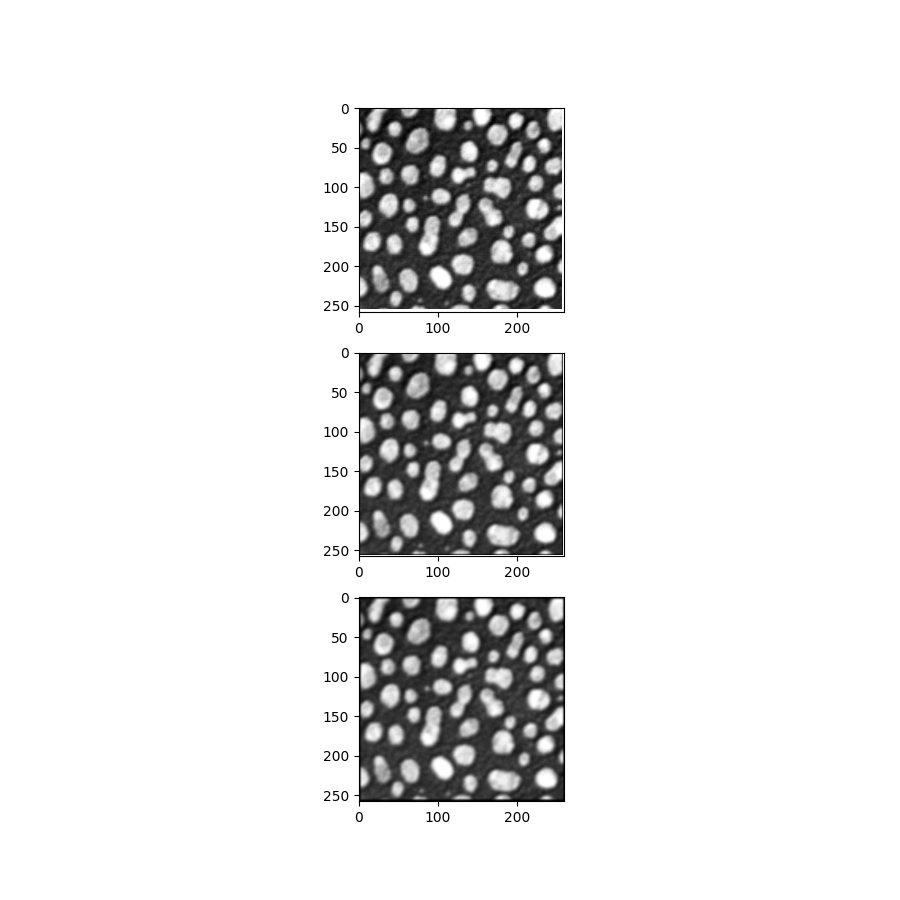

In [127]:
fig = plt.figure(figsize=(9,9))
ax_up = fig.add_subplot(311)
ax_middle = fig.add_subplot(312, sharex=ax_up, sharey=ax_up) 
ax_down = fig.add_subplot(313, sharex=ax_up, sharey=ax_up)
ax_up.imshow(image, cmap='gray')
ax_middle.imshow(image_smooth_3x3, cmap='gray')
ax_down.imshow(image_smooth_5x5, cmap='gray')

plt.show()

In [128]:
image_smooth_sigma_1 = filters.gaussian(image, sigma=1, preserve_range=True)
image_smooth_sigma_2 = filters.gaussian(image, sigma=2, preserve_range=True)
image_smooth_sigma_4 = filters.gaussian(image, sigma=4, preserve_range=True)
image_smooth_sigma_0x2 = filters.gaussian(image, sigma=[0,2], preserve_range=True)
image_smooth_sigma_2x0 = filters.gaussian(image, sigma=[2,0], preserve_range=True)
image_smooth_sigma_5x2 = filters.gaussian(image, sigma=[5,2], preserve_range=True)

<IPython.core.display.Javascript object>


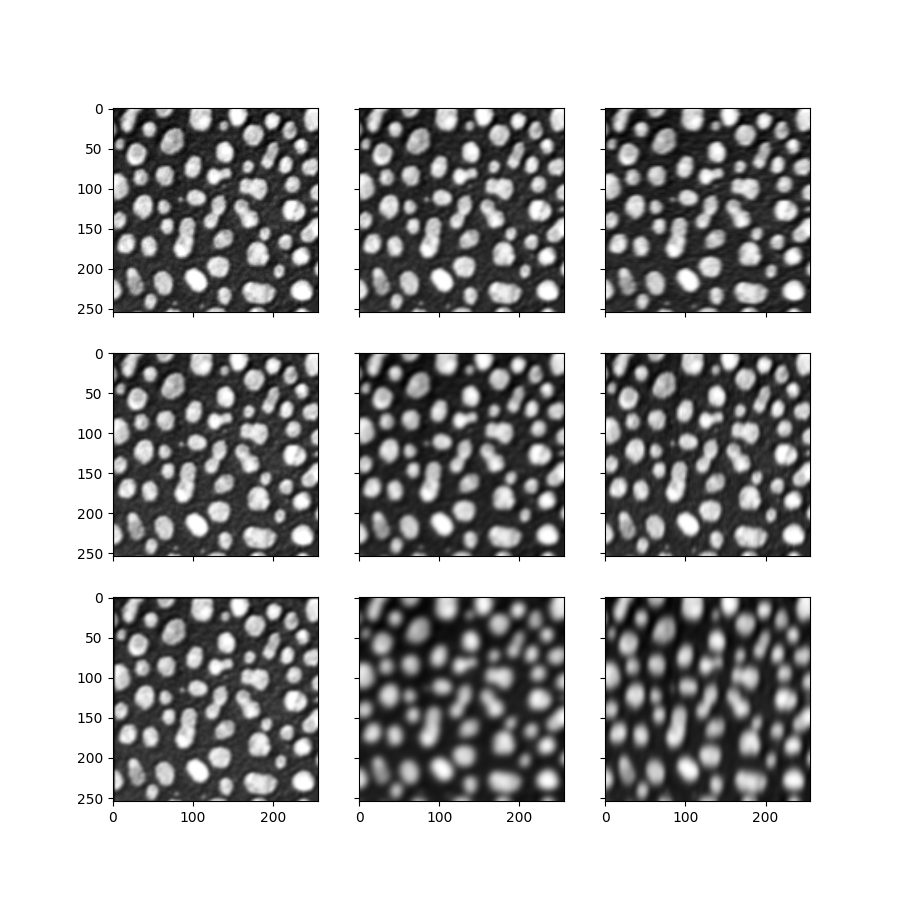

In [129]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(9,9))
axs[0, 0].imshow(image, cmap='gray')
axs[1, 0].imshow(image_smooth_3x3, cmap='gray')
axs[2, 0].imshow(image_smooth_5x5, cmap='gray')
axs[0, 1].imshow(image_smooth_sigma_1, cmap='gray')
axs[1, 1].imshow(image_smooth_sigma_2, cmap='gray')
axs[2, 1].imshow(image_smooth_sigma_4, cmap='gray')
axs[0, 2].imshow(image_smooth_sigma_0x2, cmap='gray')
axs[1, 2].imshow(image_smooth_sigma_2x0, cmap='gray')
axs[2, 2].imshow(image_smooth_sigma_5x2, cmap='gray')

plt.show()

<IPython.core.display.Javascript object>


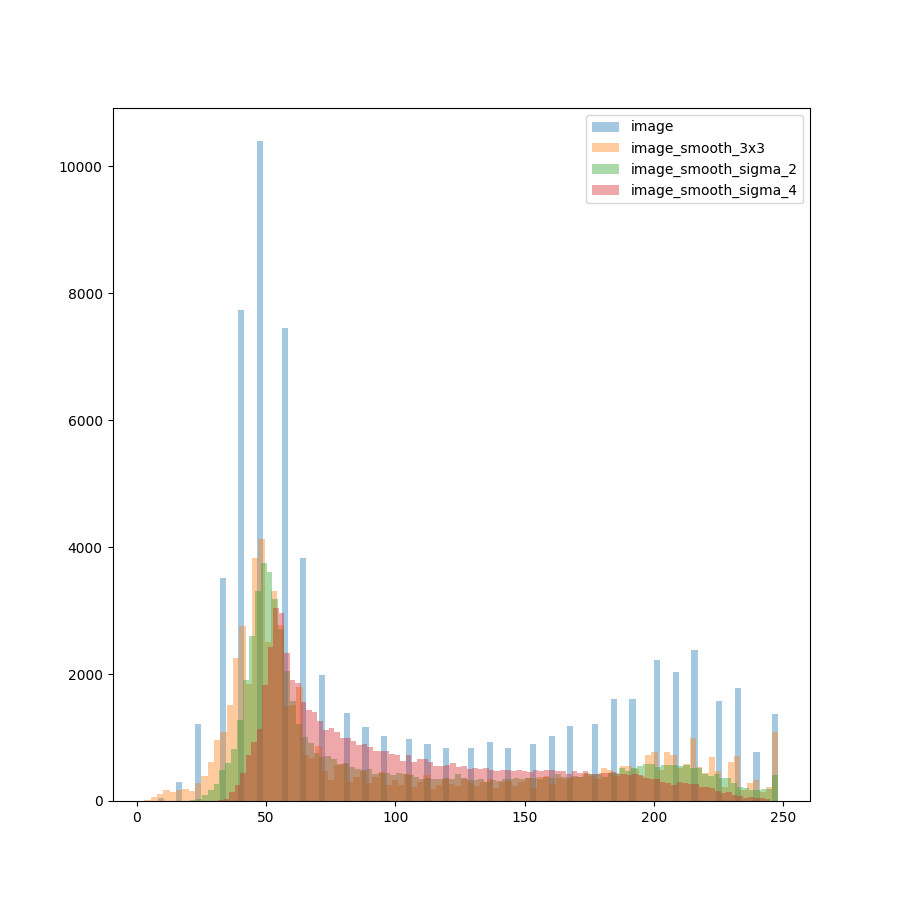

In [130]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.hist(image.ravel(), 100, label='image', alpha=0.4)
ax.hist(image_smooth_3x3.ravel(), 100, alpha=0.4, label='image_smooth_3x3')
ax.hist(image_smooth_sigma_2.ravel(), 100, alpha=0.4, label='image_smooth_sigma_2')
ax.hist(image_smooth_sigma_4.ravel(), 100, alpha=0.4, label='image_smooth_sigma_4')
ax.legend()

plt.show()

<IPython.core.display.Javascript object>


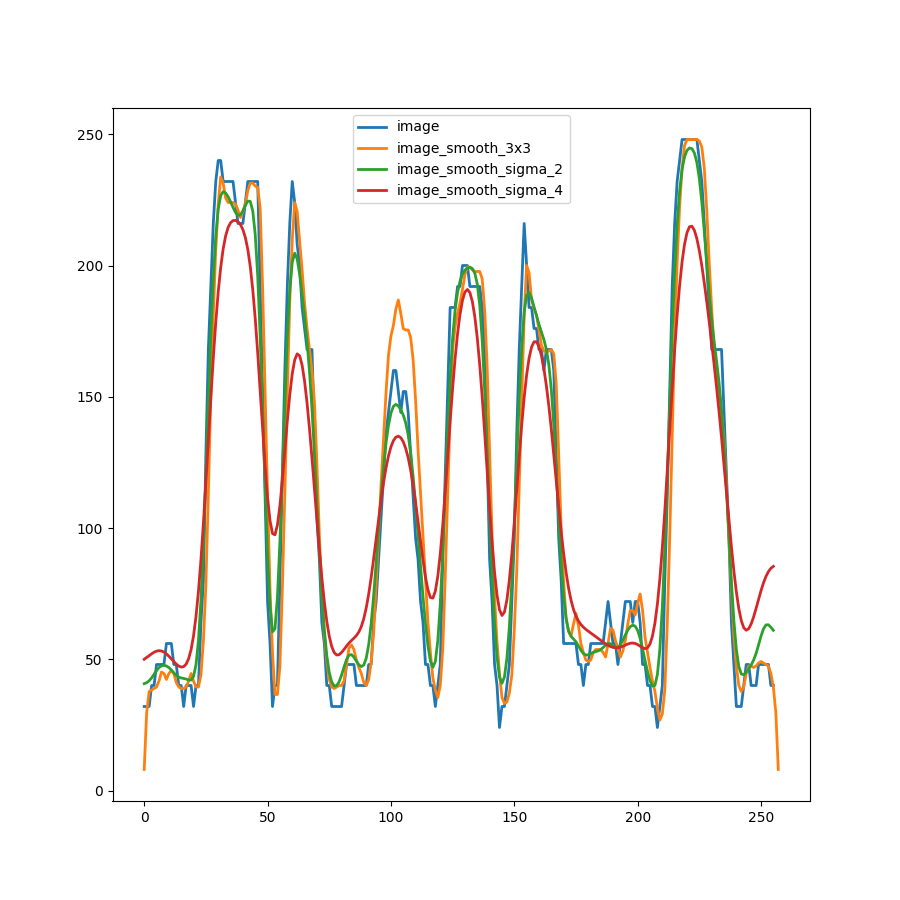

In [131]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.plot(image[120, :], linewidth=2, label='image')
ax.plot(image_smooth_3x3[120, :], linewidth=2, label='image_smooth_3x3')
ax.plot(image_smooth_sigma_2[120, :], linewidth=2, label='image_smooth_sigma_2')
ax.plot(image_smooth_sigma_4[120, :], linewidth=2, label='image_smooth_sigma_4')
ax.legend()

plt.show()

## Binarization

<IPython.core.display.Javascript object>


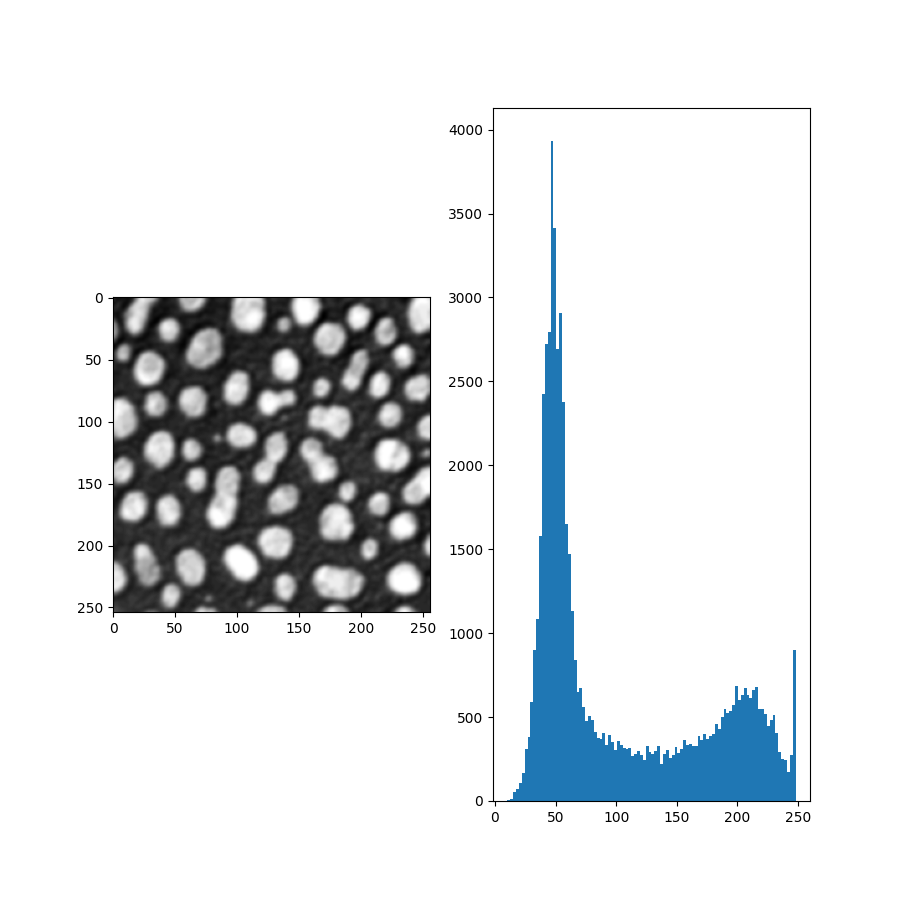

In [132]:
fig = plt.figure(figsize=(9,9))
ax_left = fig.add_subplot(121)
ax_right = fig.add_subplot(122)
ax_left.imshow(image_smooth_sigma_1, cmap='gray')
ax_right.hist(image_smooth_sigma_1.ravel(), 100)
plt.show()

In [133]:
image_threshold = image_smooth_sigma_1 > 135
print(image_threshold)

[[False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [134]:
image_threshold = image_threshold.astype(int)
print(image_threshold)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<IPython.core.display.Javascript object>


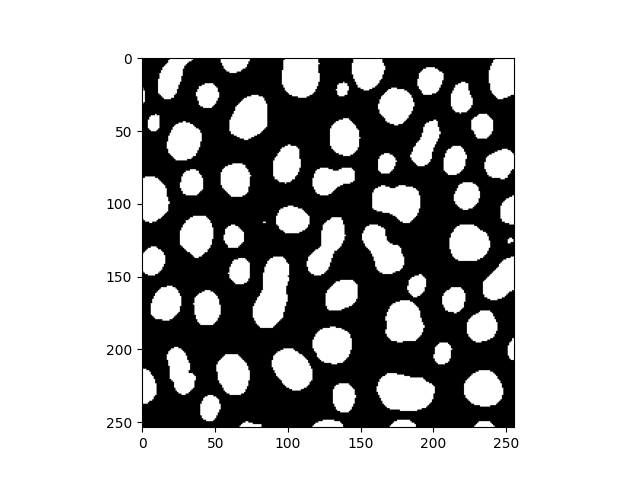

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image_threshold, cmap='gray')

plt.show()

In [136]:
otsu = filters.threshold_otsu(image_smooth_sigma_1)
image_threshold_otsu = image_smooth_sigma_1 > otsu
print(otsu)

124.96415139707777


In [137]:
iso_data = filters.threshold_isodata(image_smooth_sigma_1)
image_threshold_iso_data = image_smooth_sigma_1 > iso_data
print(iso_data)

124.03557895479156


In [138]:
yen = filters.threshold_yen(image_smooth_sigma_1)
image_threshold_yen = image_smooth_sigma_1 > yen
print(yen)

95.2498332439192


<IPython.core.display.Javascript object>


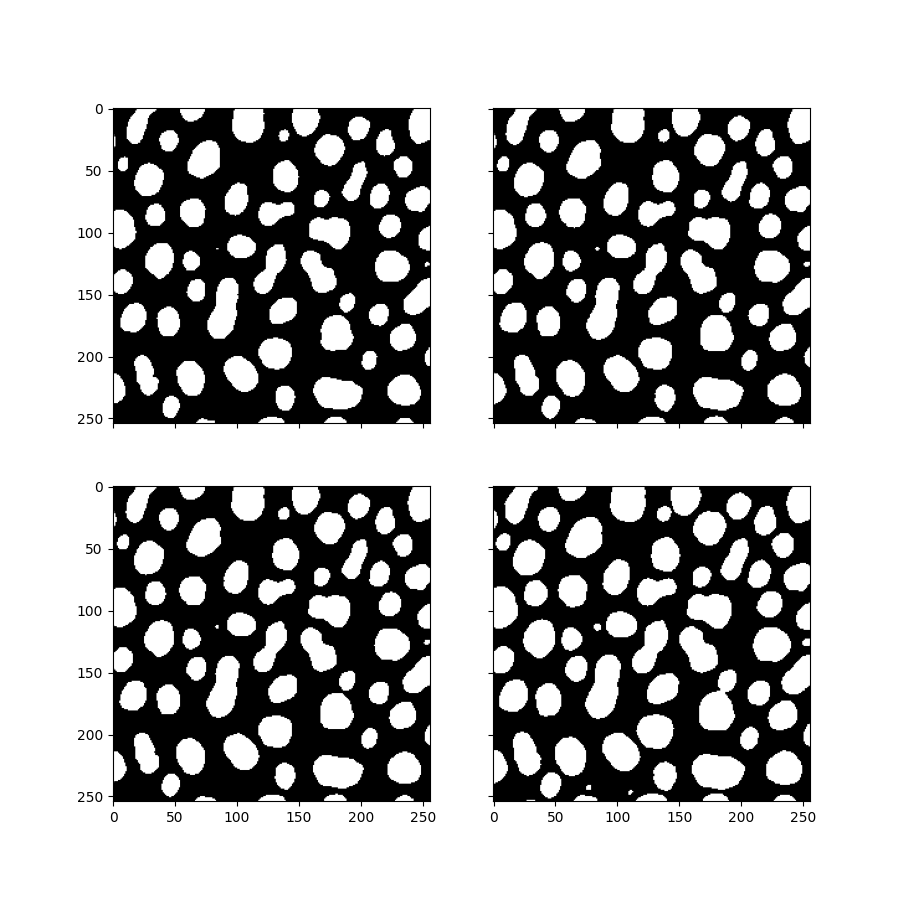

In [139]:
fig, axs = plt.subplots(2, 2, figsize=(9,9), sharex=True, sharey=True)
axs[0,0].imshow(image_threshold, cmap='gray') 
axs[1,0].imshow(image_threshold_otsu, cmap='gray')
axs[0,1].imshow(image_threshold_iso_data, cmap='gray') 
axs[1,1].imshow(image_threshold_yen, cmap='gray')
plt.show()

In [140]:
image_threshold_alt = np.where(image_smooth_sigma_1 > 135, 1, 0)
print(image_threshold_alt)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<IPython.core.display.Javascript object>


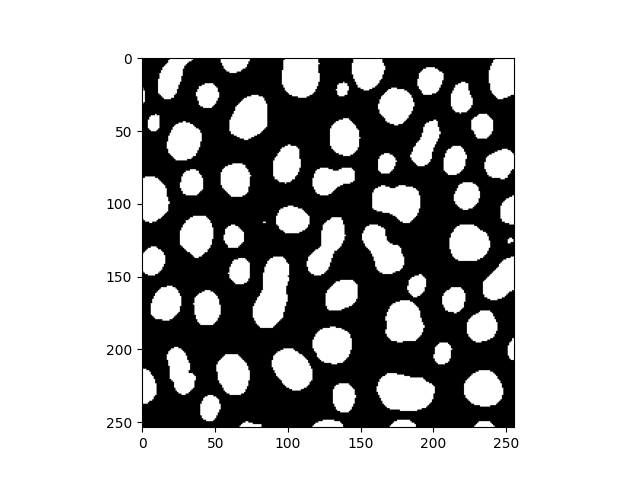

In [141]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image_threshold_alt, cmap='gray')

plt.show()

In [142]:
image_threshold_local = filters.threshold_local(image_smooth_sigma_1, block_size=15)
print(image_threshold_local)

[[ 36.40020851  35.52877058  34.14881747 ... 230.57778218 227.58765876
  225.8627202 ]
 [ 36.57169543  35.84477314  34.68493974 ... 231.54075524 228.75620048
  227.14855039]
 [ 36.88441841  36.41322334  35.63976405 ... 232.99349278 230.5695753
  229.16776195]
 ...
 [ 74.30595526  73.79302881  72.75808827 ...  48.14185253  48.22906157
   48.28672143]
 [ 76.64253344  76.03634601  74.84640579 ...  48.06056199  48.10249989
   48.13338848]
 [ 77.93800524  77.27433918  75.99018192 ...  48.02161539  48.04384579
   48.06332108]]


<IPython.core.display.Javascript object>


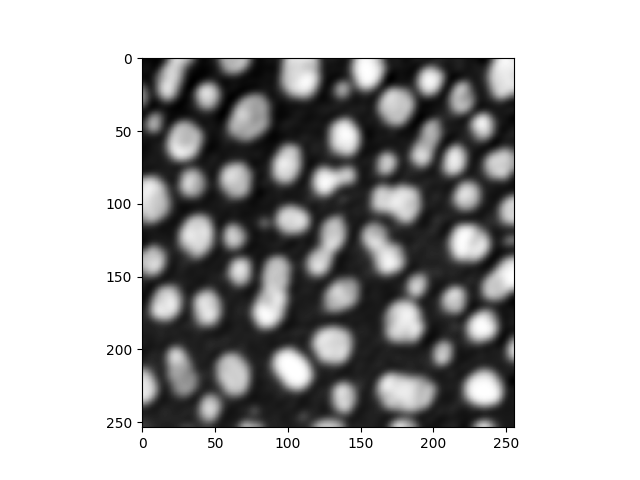

In [143]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(image_threshold_local, cmap='gray')

plt.show()

In [144]:
block_size = 15
local_thresh = filters.threshold_local(image_smooth_sigma_1, block_size, offset=10)
binary_local = image_smooth_sigma_1 > local_thresh
binary_local = binary_local.astype(int)

print(binary_local)

[[1 1 1 ... 1 0 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


<IPython.core.display.Javascript object>


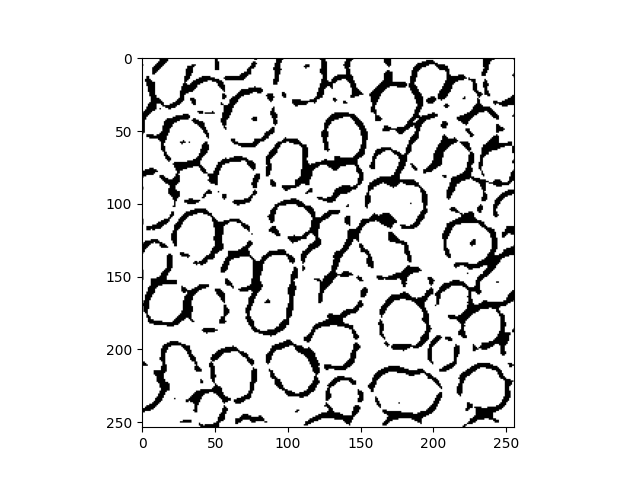

In [145]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(binary_local, cmap='gray')

plt.show()

## Segmentation // Labelling

In [146]:
labels_image_threshold = measure.label(image_threshold_otsu, background=0, return_num=True, connectivity = 1)
print(labels_image_threshold)

(array([[0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), 62)


<IPython.core.display.Javascript object>


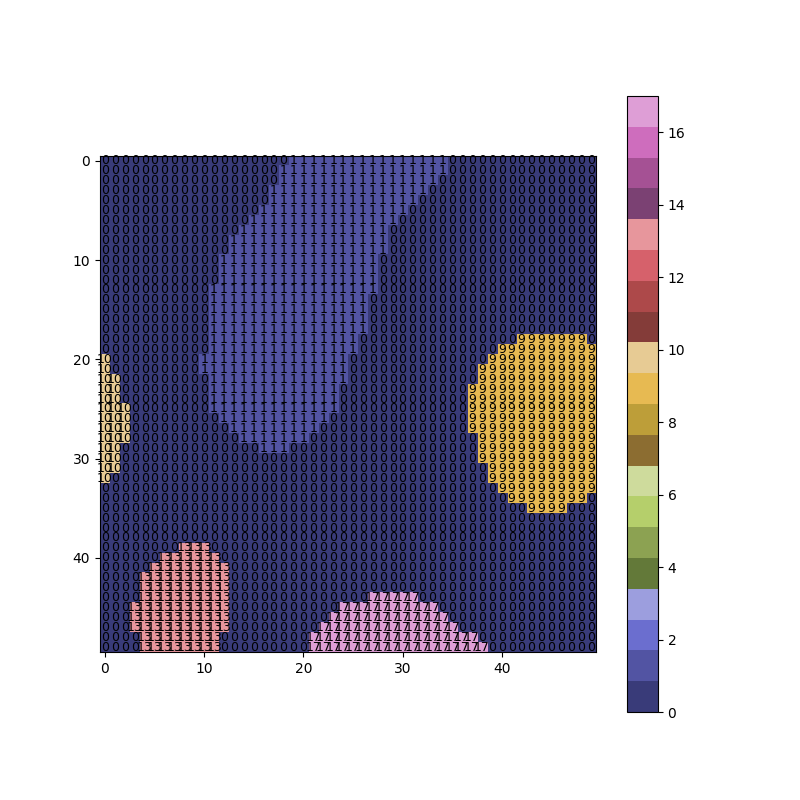

In [147]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im_disp = ax.imshow(labels_image_threshold[0][0:50, 0:50], cmap='tab20b')
plt.colorbar(im_disp, ax=ax)

for index, label in np.ndenumerate(labels_image_threshold[0][0:50, 0:50]):
    ax.annotate(label, (index[1], index[0]), horizontalalignment='center', verticalalignment='center', size=9)

plt.show()

<IPython.core.display.Javascript object>


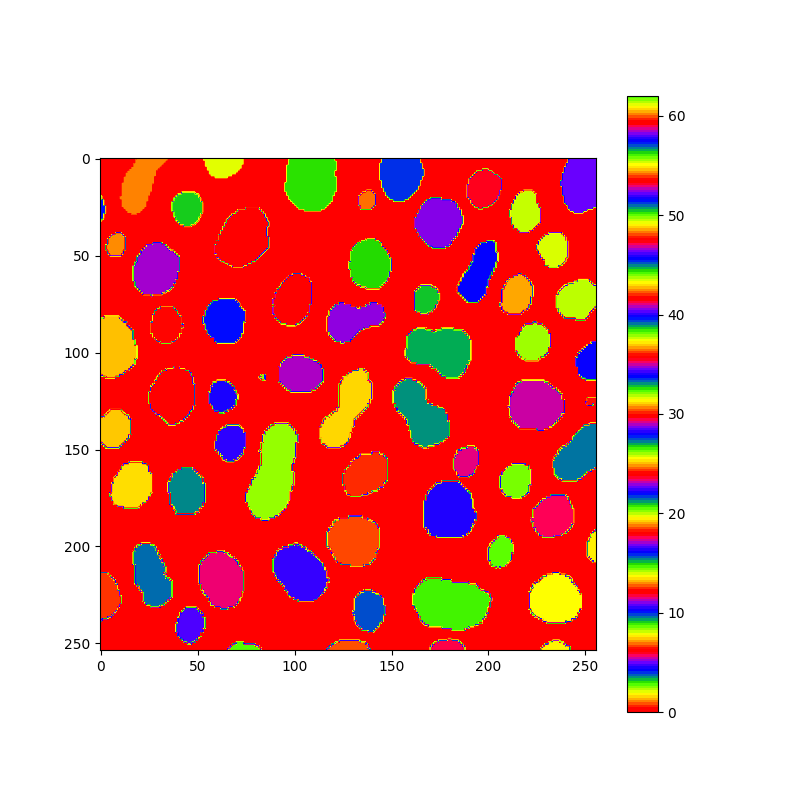

In [148]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im_disp = ax.imshow(labels_image_threshold[0], cmap='prism')
plt.colorbar(im_disp, ax=ax)
plt.show()

<IPython.core.display.Javascript object>


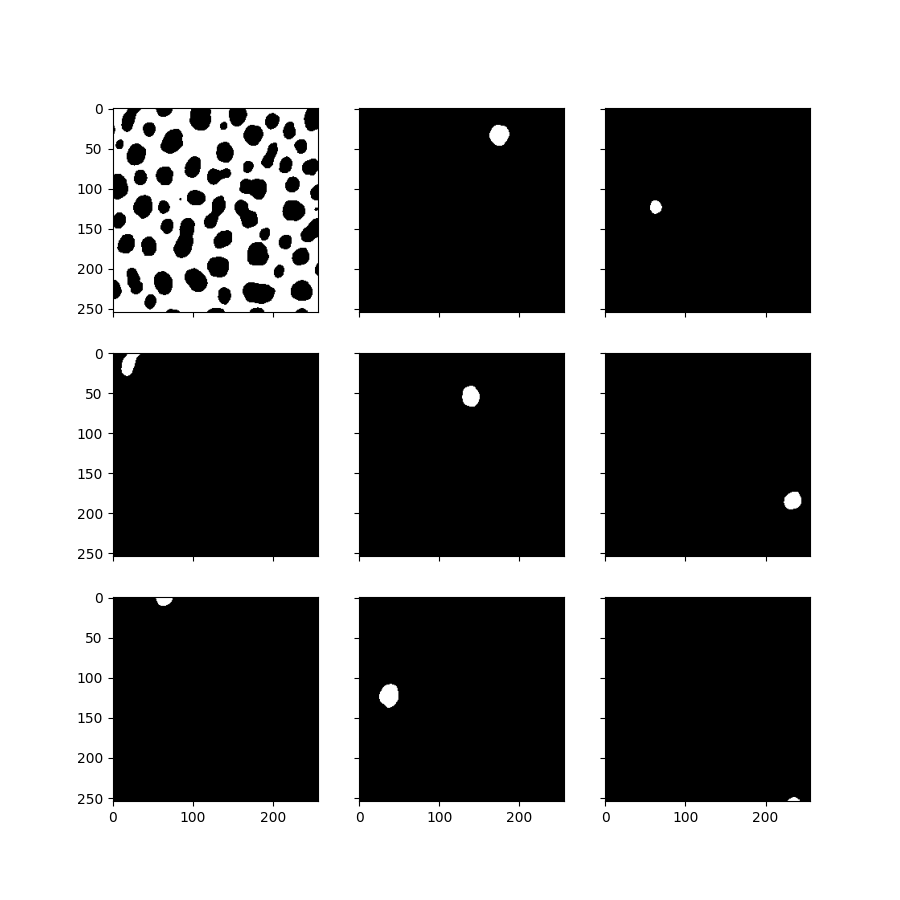

In [149]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(9,9))
axs[0, 0].imshow(labels_image_threshold[0]==0, cmap='gray')
axs[1, 0].imshow(labels_image_threshold[0]==1, cmap='gray')
axs[2, 0].imshow(labels_image_threshold[0]==2, cmap='gray')
axs[0, 1].imshow(labels_image_threshold[0]==11, cmap='gray')
axs[1, 1].imshow(labels_image_threshold[0]==15, cmap='gray')
axs[2, 1].imshow(labels_image_threshold[0]==30, cmap='gray')
axs[0, 2].imshow(labels_image_threshold[0]==34, cmap='gray')
axs[1, 2].imshow(labels_image_threshold[0]==47, cmap='gray')
axs[2, 2].imshow(labels_image_threshold[0]==61, cmap='gray')

plt.show()

In [150]:
print(labels_image_threshold[0]==0)

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [151]:
image_smooth_sigma_1_masked_background = ma.masked_array(image_smooth_sigma_1, mask=labels_image_threshold[0]==0)

In [152]:
print(image_smooth_sigma_1_masked_background)
print(np.shape(image_smooth_sigma_1_masked_background))

[[-- -- -- ... 220.92714710172342 211.21164236079628 206.71574802102973]
 [-- -- -- ... 228.3232558241058 220.60197963249783 216.83536557281357]
 [-- -- -- ... 235.32939077187297 229.7049104801282 226.8882301279483]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
(254, 256)


<IPython.core.display.Javascript object>


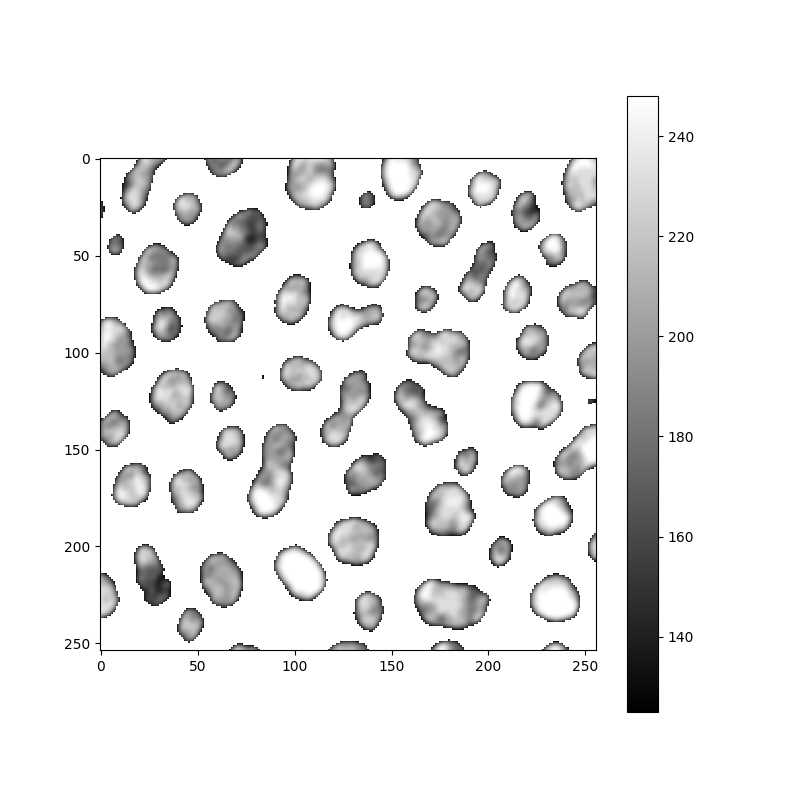

In [153]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im_disp = ax.imshow(image_smooth_sigma_1_masked_background, cmap='gray')
plt.colorbar(im_disp, ax=ax)
plt.show()

In [154]:
image_smooth_sigma_1_masked_label_30 = ma.masked_array(image_smooth_sigma_1, mask=np.invert(labels_image_threshold[0]==30))

<IPython.core.display.Javascript object>


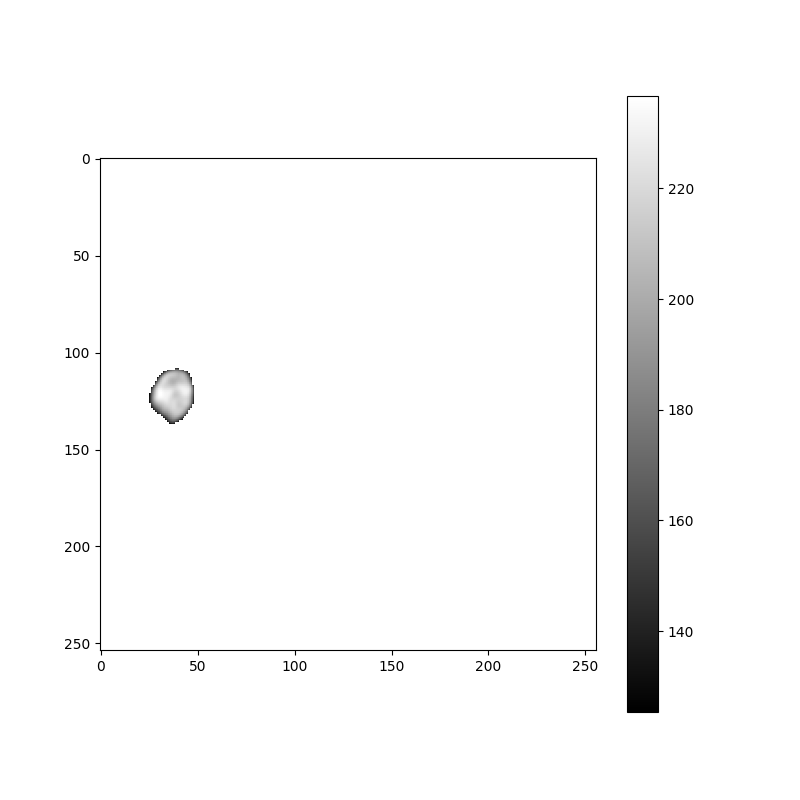

In [155]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
im_disp = ax.imshow(image_smooth_sigma_1_masked_label_30, cmap='gray')
plt.colorbar(im_disp, ax=ax)
plt.show()